# Black Friday Data EDA and Feature Engineering

### dataset link:
https://www.kaggle.com/datasets/sdolezel/black-friday?resource=download

### Problem Statement: 
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month. Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## Cleaning and Preprocessing

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from black_friday_eda.utils import load_train, load_test, check_df, concat_df_on_y_axis, grab_col_names, cat_summary, num_summary, target_summary_with_cat, target_summary_with_num

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

Loading datasets

In [3]:
df_train = load_train()
df_test = load_test()

In [4]:
check_df(df_train)

##################### Shape #####################
(550068, 11)
##################### Types #####################
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object
##################### Head #####################
        Product_ID Gender   Age  Occupation City_Category Stay_In_Current_City_Years  Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  Purchase
User_ID                                                                                                                                                                   
1000001  P00069042      F  0-17          10             A       

In [5]:
check_df(df_test)

##################### Shape #####################
(233599, 10)
##################### Types #####################
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object
##################### Head #####################
        Product_ID Gender    Age  Occupation City_Category Stay_In_Current_City_Years  Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3
User_ID                                                                                                                                                          
1000004  P00128942      M  46-50           7             B                          2               1                   

Concatenating train-test sets to preprocess as a whole and to prevent data leak.

In [4]:
df_train_test = concat_df_on_y_axis(df_train, df_test)

In [5]:
check_df(df_train_test)

##################### Shape #####################
(783667, 11)
##################### Types #####################
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object
##################### Head #####################
        Product_ID Gender   Age  Occupation City_Category Stay_In_Current_City_Years  Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  Purchase
User_ID                                                                                                                                                                   
1000001  P00069042      F  0-17          10             A       

### Observations:
- Duplicates are observed both in test and train sets.
- NA values observed on Product_Category_2 and Product_Category_3 columns.
- Slight right skew on Product_Category_1 and Product_Category_2, slight left skew on Product_Category_3 features.

## Feature Examinations
In this section features will be examined according to their numeric or categorical natures.

### Identifying Categorical and Numerical Features
Using grab_col_names() function, we can achieve a seperation by defining some rules. Parameters used to define seperation rule in this function is as follows:
- cat_th (int): Threshold for numerical columns to be considered categorical. Defined: 8 => due to maximum unique value containing cat feature is Age. Occupation is an exception. 
- car_th (int): Threshold for categorical columns to be considered cardinal. Defined: 22



In [6]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_train_test)
print(f"Categorical Columns: {cat_cols}")
print(f"Numerical Columns: {num_cols}")
print(f"Categorical but Cardinal Columns: {cat_but_car}")

Observations: 783667
Variables: 11
cat_cols: 5
num_cols: 5
cat_but_car: 1
num_but_cat: 1
Categorical Columns: ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
Numerical Columns: ['Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']
Categorical but Cardinal Columns: ['Product_ID']


### Categorical Columns Visualization

        Gender  Ratio
Gender               
M       414259 75.311
F       135809 24.689



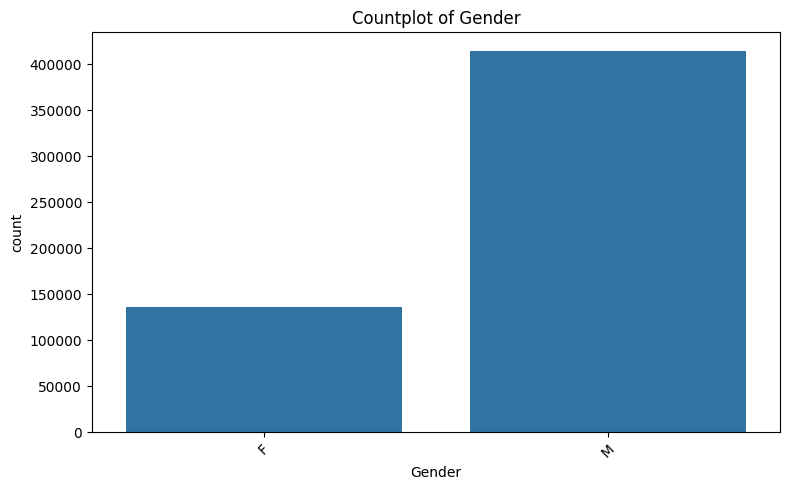

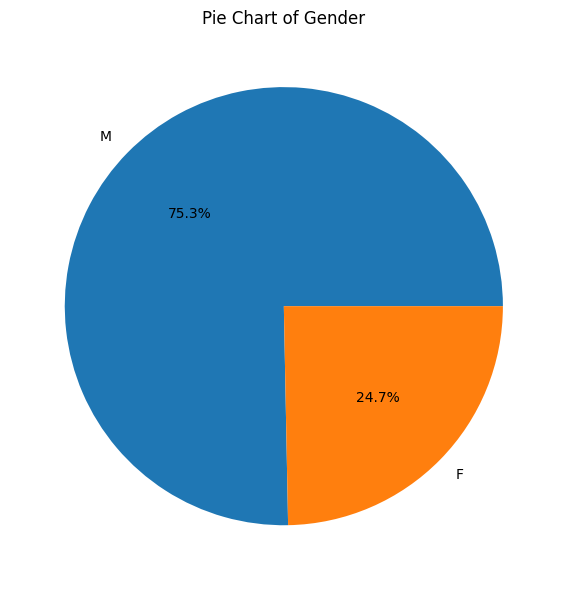

Target Summary for: Gender -> Purchase
        TARGET_MEAN
Gender             
F          8734.566
M          9437.526



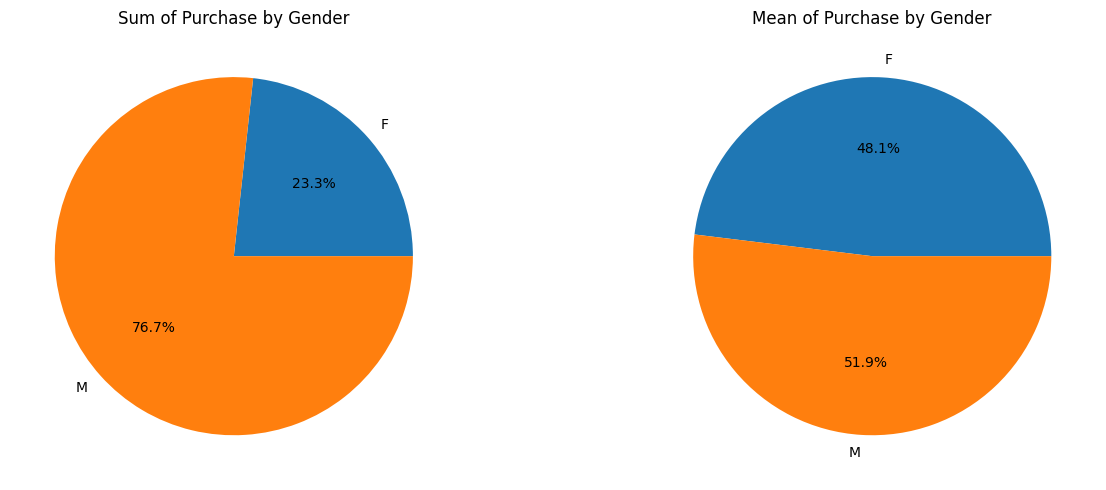

          Age  Ratio
Age                 
26-35  219587 39.920
36-45  110013 20.000
18-25   99660 18.118
46-50   45701  8.308
51-55   38501  6.999
55+     21504  3.909
0-17    15102  2.745



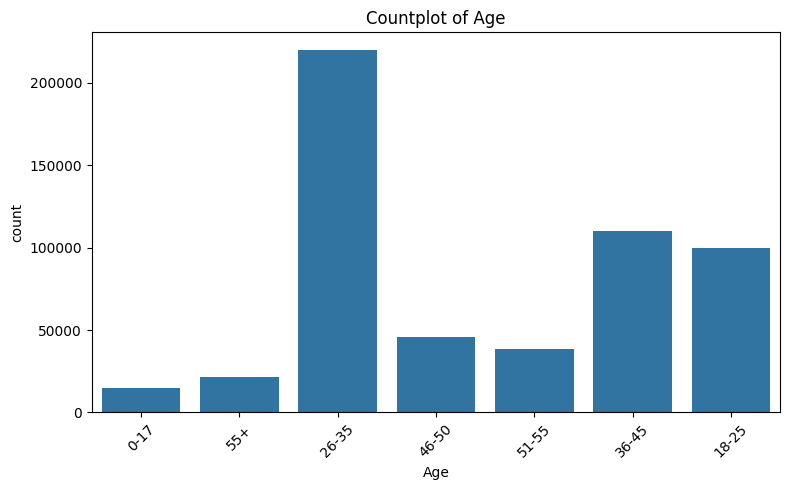

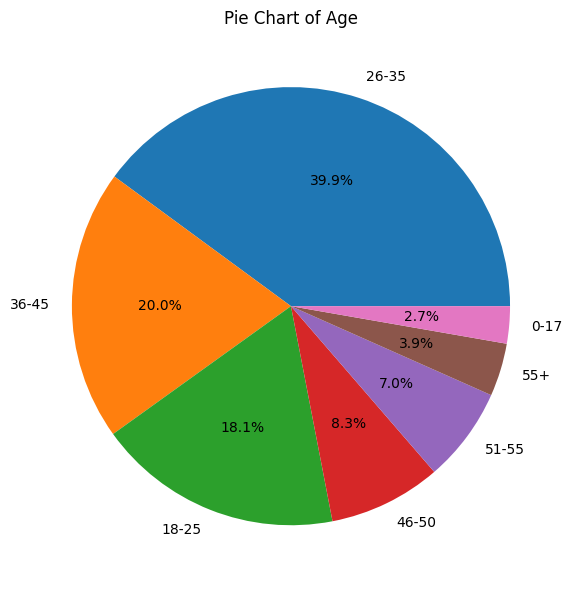

Target Summary for: Age -> Purchase
       TARGET_MEAN
Age               
0-17      8933.465
18-25     9169.664
26-35     9252.691
36-45     9331.351
46-50     9208.626
51-55     9534.808
55+       9336.280



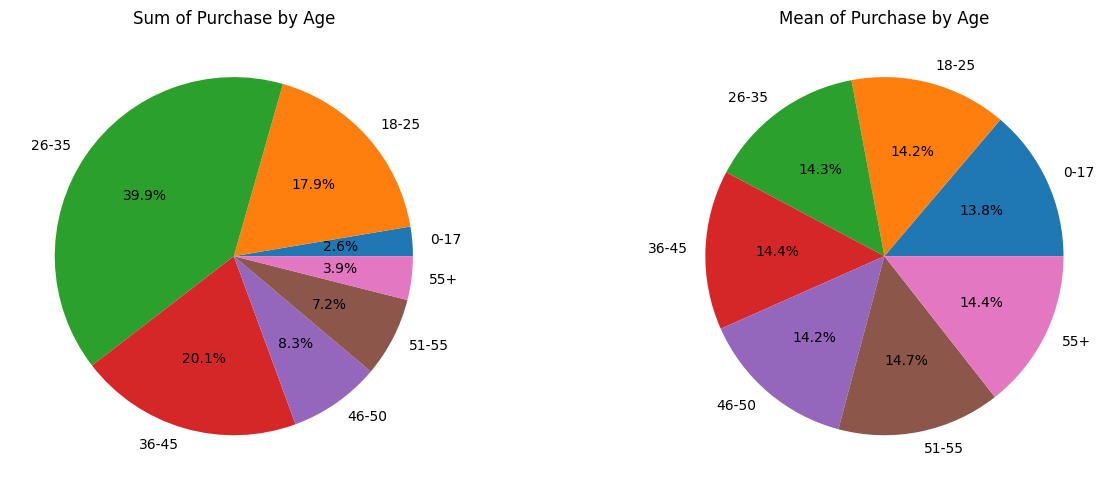

               City_Category  Ratio
City_Category                      
B                     231173 42.026
C                     171175 31.119
A                     147720 26.855



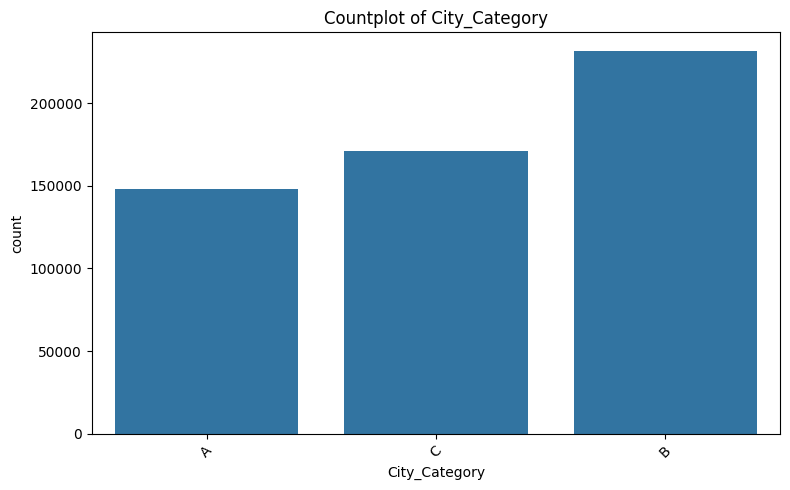

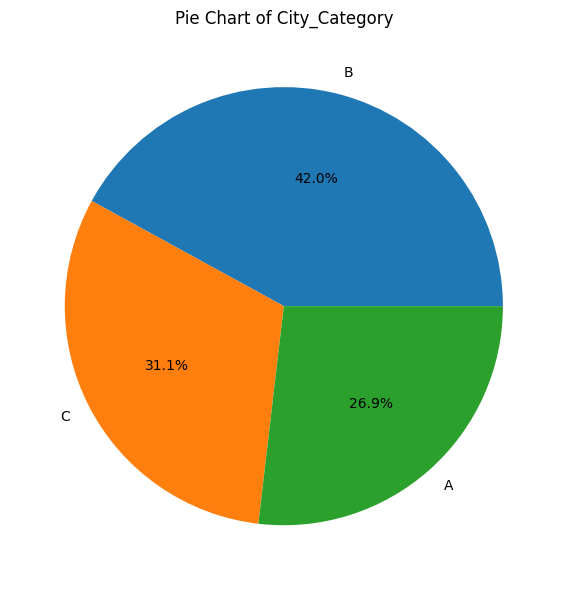

Target Summary for: City_Category -> Purchase
               TARGET_MEAN
City_Category             
A                 8911.939
B                 9151.301
C                 9719.921



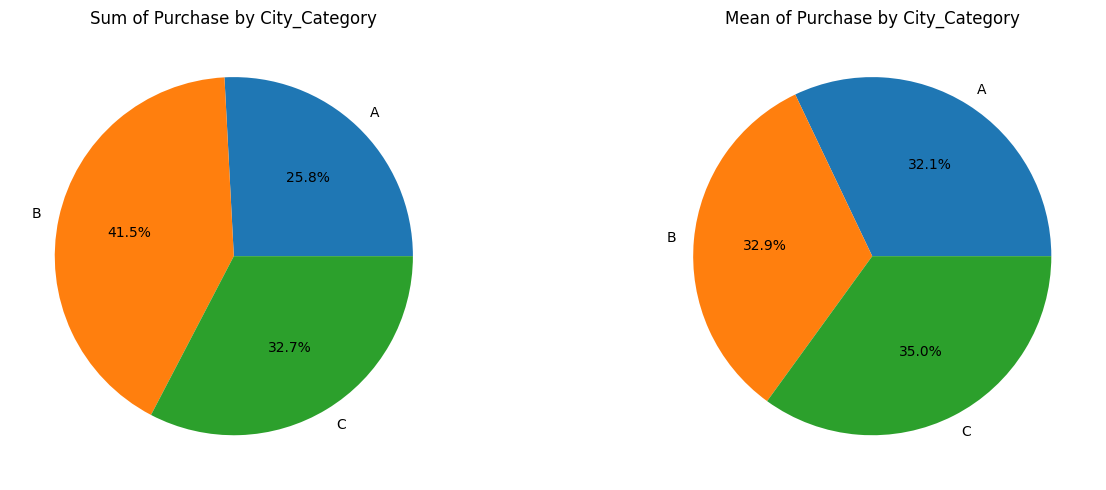

                            Stay_In_Current_City_Years  Ratio
Stay_In_Current_City_Years                                   
1                                               193821 35.236
2                                               101838 18.514
3                                                95285 17.322
4+                                               84726 15.403
0                                                74398 13.525



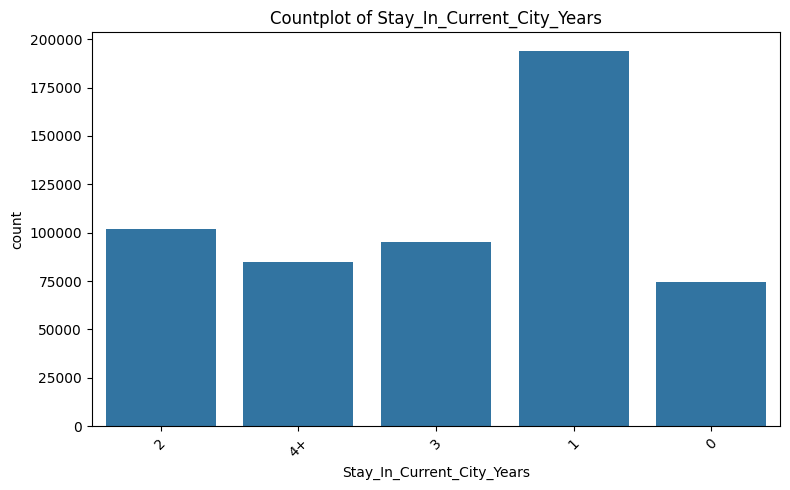

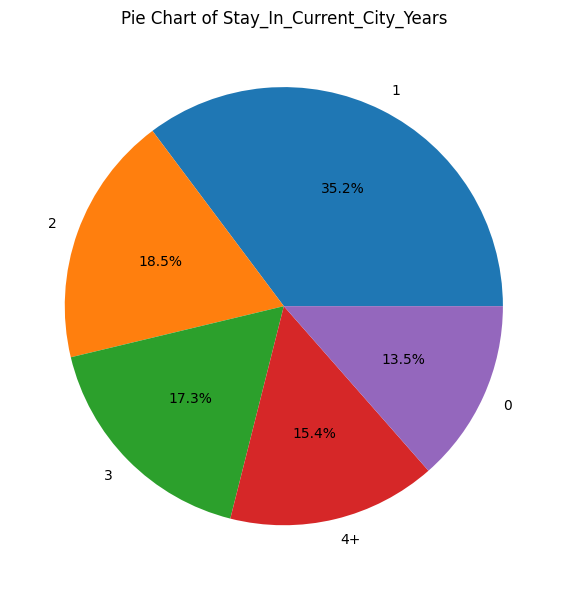

Target Summary for: Stay_In_Current_City_Years -> Purchase
                            TARGET_MEAN
Stay_In_Current_City_Years             
0                              9180.075
1                              9250.146
2                              9320.430
3                              9286.904
4+                             9275.599



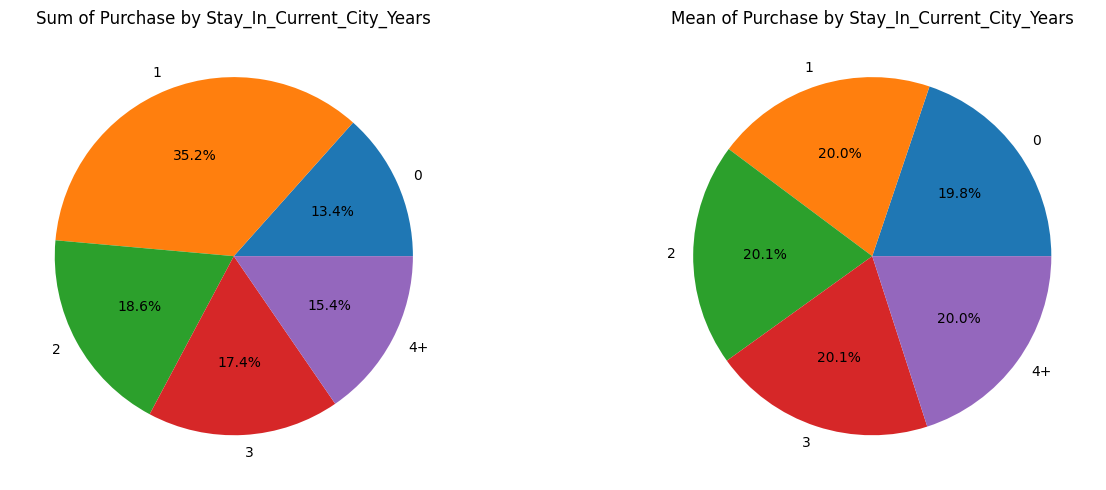

                Marital_Status  Ratio
Marital_Status                       
0                       324731 59.035
1                       225337 40.965



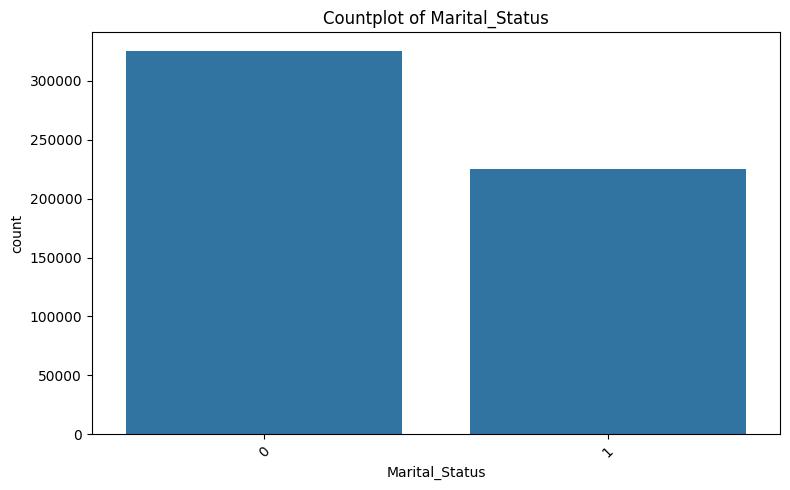

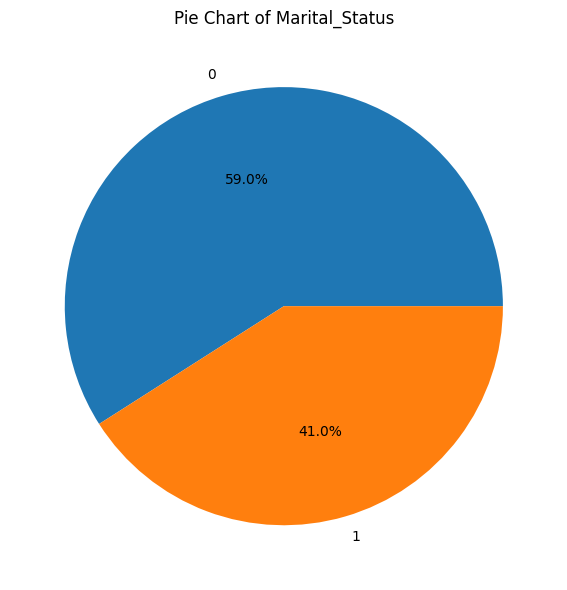

Target Summary for: Marital_Status -> Purchase
                TARGET_MEAN
Marital_Status             
0                  9265.908
1                  9261.175



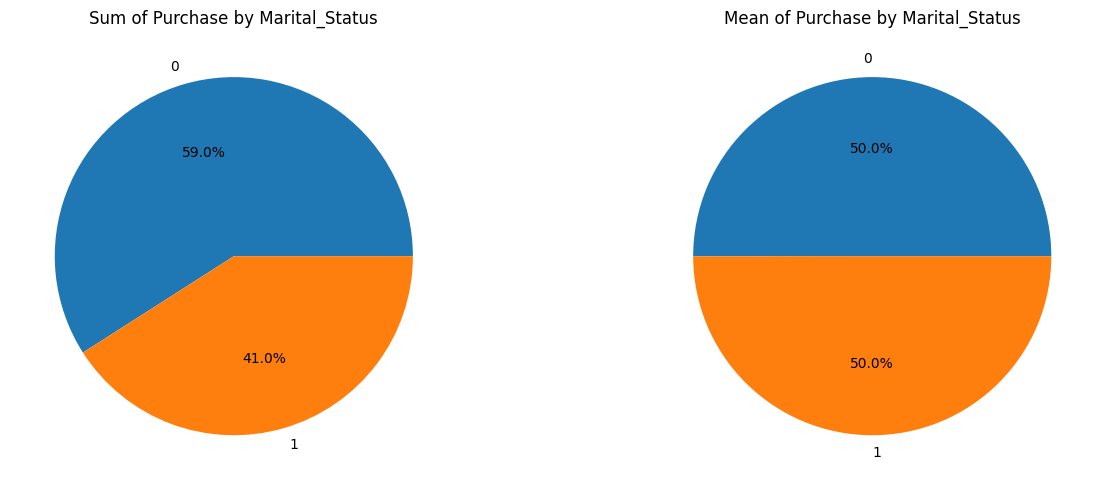

In [11]:
for col in cat_cols:
    cat_summary(df_train, col, plot=True, target="Purchase", plot_type="all")

## Observations
1. Gender
The dataset is significantly imbalanced in terms of gender, with male customers outnumbering female customers by approximately 3:1. On average, male customers spend 3.8% more than female customers. This suggests that gender may serve as a relevant predictor for the purchase amount.

2. Age
The age variable is provided in categorical form (e.g., 0–17, 18–25, ...). Although the distribution visually appears to resemble a normal distribution, this cannot be confirmed due to the categorical nature of the data. Mean purchase amounts are fairly consistent across all age groups, indicating that age might not be a strong individual predictor.

3. City_Category
The city category variable contains three groups: A, B, and C. The distribution among these categories is relatively balanced, with Category B being the most frequent, followed by C and A. Customers from City Category C spend approximately 3% more on average compared to those from categories A and B. This variable may offer useful insights when modeling purchase behavior.

4. Stay_In_Current_City_Years
The most frequent value in this category is 1 year, accounting for 35.2% of the data. Other categories are more evenly distributed. Mean purchase amounts are similar across all groups, suggesting this variable may have limited standalone predictive power but could still contribute in interaction with other variables.

5. Marital_Status
There is a slight imbalance between married and unmarried customers, with unmarried customers outnumbering married ones by 3:2. However, the average purchase amount is equally distributed (50:50) between the two groups. As such, marital status does not appear to influence purchase behavior significantly on its own.

Summary statistics for: Occupation

count   550068.000
mean         8.077
std          6.523
min          0.000
25%          2.000
50%          7.000
75%         14.000
max         20.000
Name: Occupation, dtype: float64



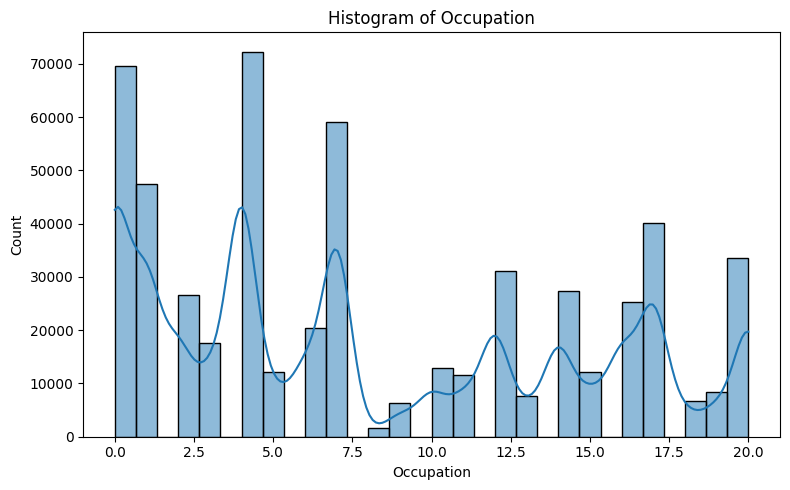

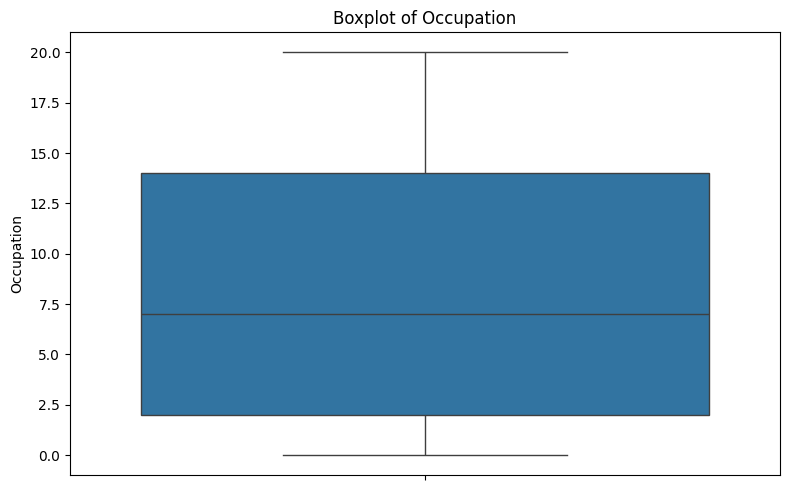

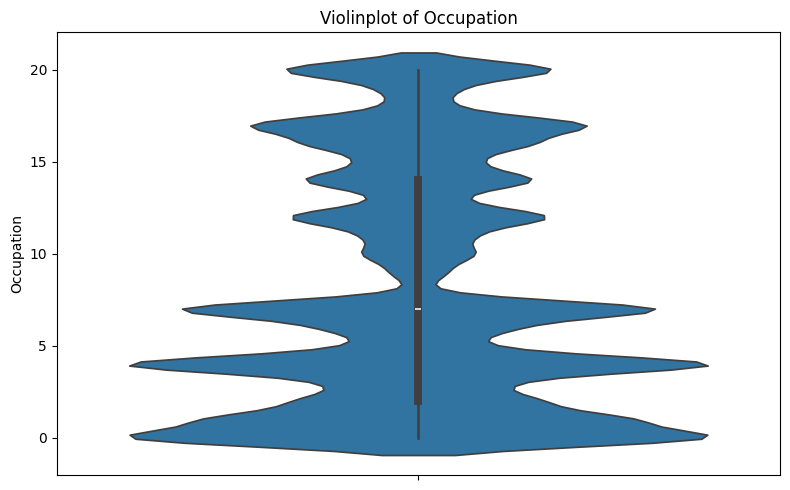

Summary statistics for: Product_Category_1

count   550068.000
mean         5.404
std          3.936
min          1.000
25%          1.000
50%          5.000
75%          8.000
max         20.000
Name: Product_Category_1, dtype: float64



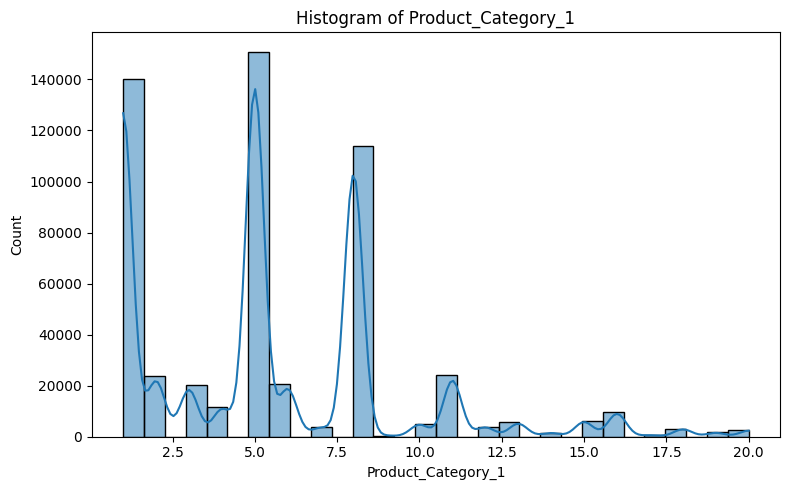

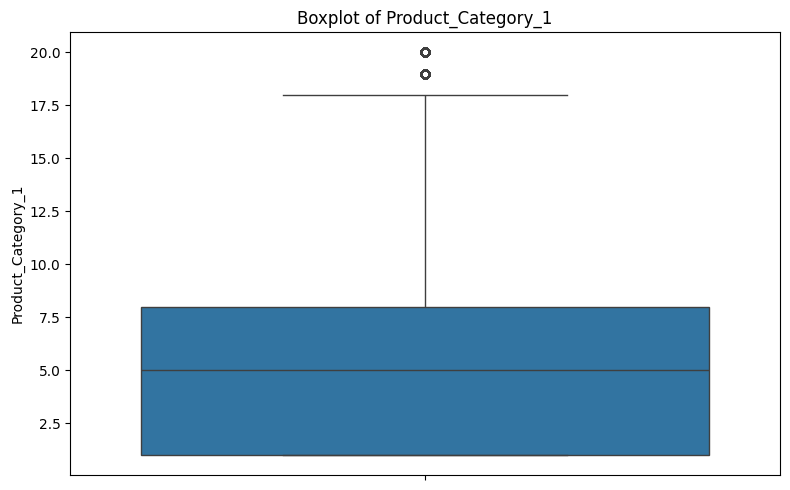

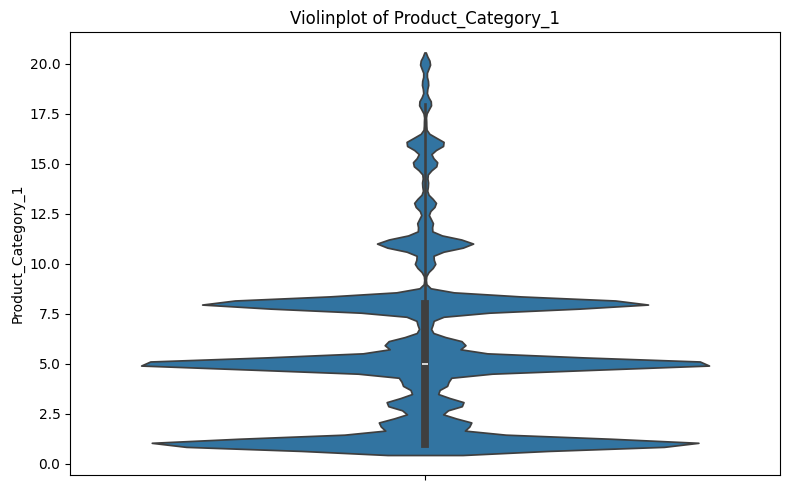

Summary statistics for: Purchase

count   550068.000
mean      9263.969
std       5023.065
min         12.000
25%       5823.000
50%       8047.000
75%      12054.000
max      23961.000
Name: Purchase, dtype: float64



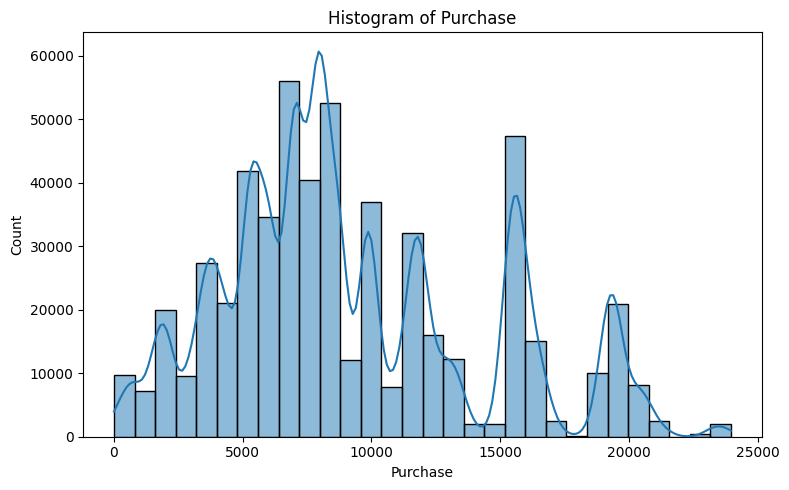

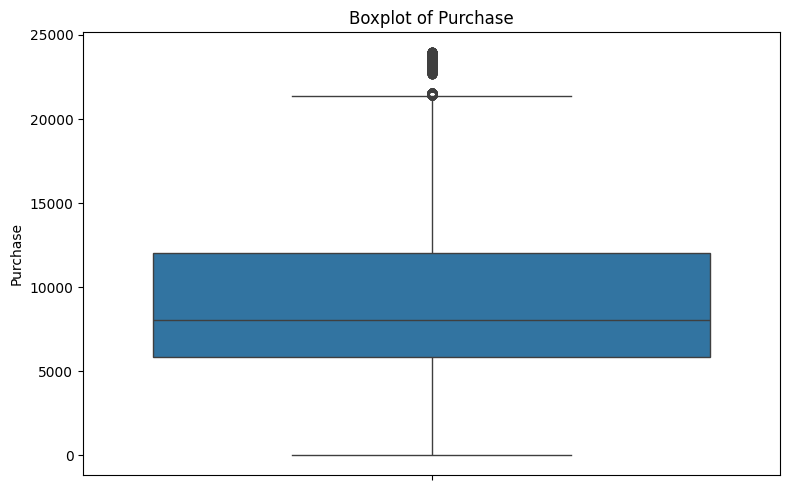

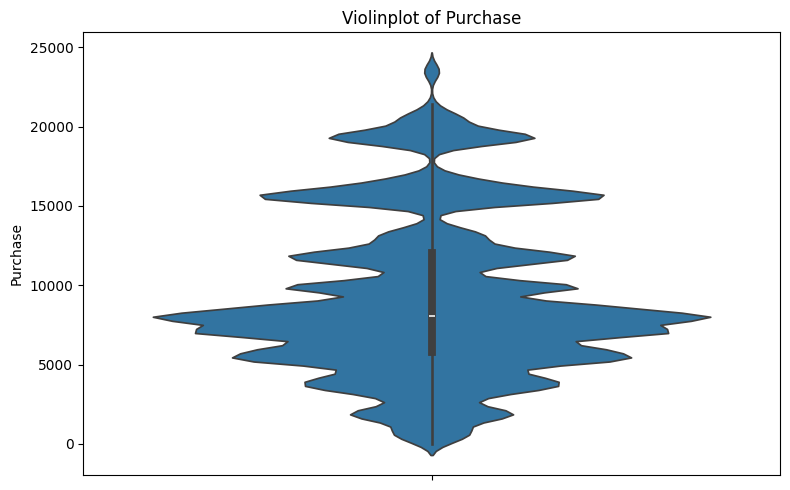

In [12]:
for col in num_cols:
    if (col != "Product_Category_3") & (col != "Product_Category_2"):
        num_summary(df_train, col, plot=True)